Please upload a video file (e.g., .mp4):


Saving video.mp4 to video (1).mp4
Extracted 17 frames from the video.
Panorama created successfully.


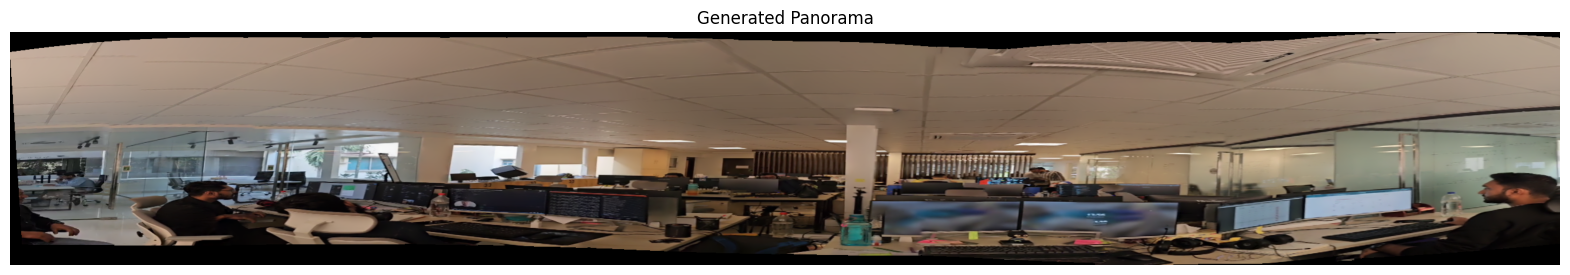

Saving and downloading file: panorama.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files


print("Please upload a video file (e.g., .mp4):")
uploaded = files.upload()
video_path = next(iter(uploaded))  # Get the filename from uploaded files



def extract_frames(video_path, step=15):

    cap = cv2.VideoCapture(video_path)
    frames = []
    count = 0

    while True:
        success, frame = cap.read()
        if not success:
            break
        if count % step == 0:
            frame = cv2.resize(frame, (640, 360))
            frames.append(frame)
        count += 1

    cap.release()
    return frames

frames = extract_frames(video_path)
print(f"Extracted {len(frames)} frames from the video.")



def create_panorama(frames):

    stitcher = cv2.Stitcher_create()
    status, panorama = stitcher.stitch(frames)

    if status == cv2.Stitcher_OK:
        print("Panorama created successfully.")
        return panorama
    else:
        print("Error creating panorama. Status code:", status)
        return None

panorama_image = create_panorama(frames)



if panorama_image is not None:
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(panorama_image, cv2.COLOR_BGR2RGB))
    plt.title("Generated Panorama")
    plt.axis('off')
    plt.show()

    output_file = "panorama.jpg"
    cv2.imwrite(output_file, panorama_image)
    print(f"Saving and downloading file: {output_file}")
    files.download(output_file)
else:
    print("Failed to generate panorama.")
